# 一、读写文本格式数据

pandas提供了一些用于将表格型数据读取为DataFrame对象的函数。下面表格对其做了总结，其中read_csv和read_table可能会是你今后用得最多的。

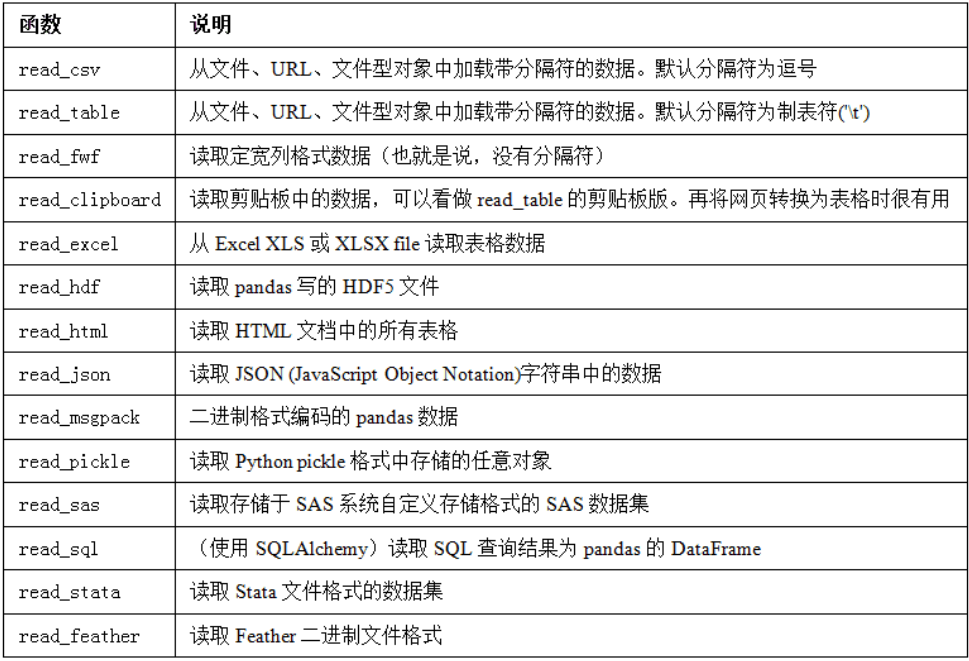

***

In [1]:
#导包
import numpy as np
import pandas as pd 
import matplotlib as plt
np.random.seed(12345)
plt.rc('figure',figsize=(10,6))
np.set_printoptions(precision=4,suppress=True)

## read_csv()

In [2]:
#（1）
#将原始内容打印在屏幕上
!type "examples\ex1.csv"

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [3]:
#read_csv()
df=pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


*** 

In [4]:
#（2）
#打印ex2.csv原始内容
!type "examples\ex2.csv"

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [5]:
#若文件没有标题行，则可以让pandas为其分配默认的列名
pd.read_csv('examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
#也可以自己定义列名
pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


***

In [7]:
#(3)
#若要将某列指定为index，则可通过index_col参数指定“message”
names=['a', 'b', 'c', 'd', 'message']
pd.read_csv('examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [8]:
#也可以指定多个列，形成层次化索引
!type "examples\csv_mindex.csv"

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [9]:
pd.read_csv('examples/csv_mindex.csv',index_col=['key1','key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

***

In [10]:
#(4)
#处理异形文件，比如跳过某些行
!type "examples\ex4.csv"

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [11]:
#用skiprows跳过文件的第一行、第三行和第四行
pd.read_csv('examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


***

## read_table()

In [12]:
#(1)
#read_table()
#注意要指定分隔符
pd.read_table('examples/ex1.csv',sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


***

In [13]:
#(2)
#表格可能不是用固定的分隔符去分隔字段的（比如空白符或其它模式）
!type "examples\ex3.txt"

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In [14]:
#空白字符间隔开的,用正则表达式表达为\s+
pd.read_table('examples/ex3.txt', sep='\s+')
#由于列名比数据行的数量少，所以read_table推断第一列应该是DataFrame的索引index

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


***

## read_csv和read_table常用的选项

- path:表示文件系统位置，URL，文件型对象的字符串；
- sep和delimiter:用于对行中各字段进行拆分的字符序列或正则表达式；
- header：用作列名的行号。默认0（第一行），如果没有header行就设置为None；
- index_col:用作行索引的列编号或列名。可以是单个名称/数字或多个名称/数字组成的列表(层次化索引)；
- names：用于结果的列名列表，结合header=None；
- skiprows:需要忽略的行数(从文件开始处算起)，或需要跳过的行号列表(从0开始)；
- na_values:一组用于替换NA的值；
- comment:用于将注释信息从行尾拆分出去的字符(一个或多个);
- parse_dates:尝试将数据解析为日期，默认为False；
- keep_date_col:如果连接多列解析日期，则保持参与连接的列。默认为False。
- converters：由列号/列名跟函数之间的映射关系组成的字典。例如，{'foo':f}会对foo列的所有值应用函数f；
- dayfirst：当解析有歧义的日期时，将其看做国际格式。默认为False；
- date_parser:用于解析日期的函数；
- nrows：需要读取的行数(从文件开始处算起)；
- iterator:返回一个TextParser以便逐块读取文件；
- chunksize：文件块的大小(用于迭代)；
- skip_footer:需要忽略的行数(从文件末尾处算起)；
- verbose:打印各种解析器输出信息，比如“非数值列中缺失值的数量”等；
- encoding：用于unicode的文件编码格式；
- squeeze：如果数据经解析后仅含一列，则返回Series；
- thousands：千分位分隔符，如“，”或“.”；

***

# 二、逐块读取文本文件==》nrows

在处理很大的文件时，或找出大文件中的参数集以便于后续处理时，你可能只想读取文件的一小部分或逐块对文件进行迭代。

In [17]:
#文本数据很大
result=pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [18]:
#通过nrows进行指定，读取几行
pd.read_csv('examples/ex6.csv',nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


***

# 三、将数据写出到文本格式==》to_csv()

In [19]:
#读取一个文件
data=pd.read_csv('examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [25]:
#（1）
#利用DataFrame的to_csv方法，我们可以将数据写到一个以逗号分隔的文件中
data.to_csv('examples/out.csv')

In [26]:
!type "examples\out.csv"

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [27]:
#（2）
#还可以指定其他的分隔符，用sep属性来指定
#这里直接写出到sys.stdout，所以仅仅是打印出文本结果而已
import sys
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [29]:
#（3）
#将缺失值NaN替换成其他的值
data.to_csv(sys.stdout, na_rep='CY')

,something,a,b,c,d,message
0,one,1,2,3.0,4,CY
1,two,5,6,CY,8,world
2,three,9,10,11.0,12,foo


***

# 四、二进制数据格式

实现数据的高效二进制格式存储最简单的办法之一是使用Python内置的pickle序列化。pandas对象都有一个用于将数据以pickle格式保存到磁盘上to_pickle方法。

In [31]:
frame=pd.read_csv('examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [33]:
#将数据pickle序列化(类似加密)
frame.to_pickle('examples/frame_pickle')

In [34]:
#通过pickle直接读取被pickle化的数据
pd.read_pickle('examples/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


***